## Churn Prediction:

Build predictive models to identify customers who are likely to churn.
Using historical data to train models that can generalize to new customers.
By leveraging such a dataset, banks can proactively manage customer relationships and reduce churn rates, thereby improving customer satisfaction and profitability.

In [1]:
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
import seaborn as sns
from IPython.display import display 
from sklearn import model_selection
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, roc_auc_score, precision_score
from sklearn.model_selection import RandomizedSearchCV

In [3]:
#Import the data
df = 'BankChurners.csv'
df = pd.read_csv(df)
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [4]:
df.shape

(10127, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [6]:
#Import the packages
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)

In [7]:
#Separate the dataframes into customer who attrited and those who didn't

dfatt = df[df['Attrition_Flag'] == 'Attrited Customer']
dfexis = df[df['Attrition_Flag'] == 'Existing Customer']


In [8]:
dfatt

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
21,708508758,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,...,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
39,708300483,Attrited Customer,66,F,0,Doctorate,Married,Unknown,Blue,56,...,4,3,7882.0,605,7277.0,1.052,704,16,0.143,0.077
51,779471883,Attrited Customer,54,F,1,Graduate,Married,Less than $40K,Blue,40,...,3,1,1438.3,808,630.3,0.997,705,19,0.900,0.562
54,714374133,Attrited Customer,56,M,2,Graduate,Married,$120K +,Blue,36,...,3,3,15769.0,0,15769.0,1.041,602,15,0.364,0.000
61,712030833,Attrited Customer,48,M,2,Graduate,Married,$60K - $80K,Silver,35,...,4,4,34516.0,0,34516.0,0.763,691,15,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10119,716893683,Attrited Customer,55,F,3,Uneducated,Single,Unknown,Blue,47,...,3,3,14657.0,2517,12140.0,0.166,6009,53,0.514,0.172
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [9]:
dfexis

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10116,714109308,Existing Customer,46,M,5,College,Single,$80K - $120K,Blue,36,...,2,3,13187.0,2241,10946.0,0.689,15354,112,0.931,0.170
10117,712503408,Existing Customer,57,M,2,Graduate,Married,$80K - $120K,Blue,40,...,3,4,17925.0,1909,16016.0,0.712,17498,111,0.820,0.106
10120,710841183,Existing Customer,54,M,1,High School,Single,$60K - $80K,Blue,34,...,2,0,13940.0,2109,11831.0,0.660,15577,114,0.754,0.151
10121,713899383,Existing Customer,56,F,1,Graduate,Single,Less than $40K,Blue,50,...,1,4,3688.0,606,3082.0,0.570,14596,120,0.791,0.164


In [10]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


## Who are customers that leave banks?
 In any business, we want to understand the customer lifecycle, and put in methodologies to prevent customers leaving. Normally in financial services, you can see customers start to disengage before they actually close their products, and this is the point to intervene. In this analysis, we will analyse the factors that seem to affect whether a customer will attrite.

# Hypothesis 1: Customers who attrite are more likely to be younger
The first hypothesis we want to test is whether customers who attrite are likely to be younger.  Many financial services firms are struggling to attract and keep younger customers vs fintechs

In [11]:
#Build the boxplot
fig1 = go.Figure()
fig1.add_trace(go.Box(y = dfatt['Customer_Age'], name = 'Attrition base'))
fig1.add_trace(go.Box(y = dfexis['Customer_Age'], name = 'Existing customers'))
fig1.update_layout(plot_bgcolor = 'white', title = 'Age distribution of customers who attrited versus those who remain', yaxis = dict(title = 'Age'))
fig1.show()

In [12]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


The attrition base is slightly older but this is not significant in this dataset.

**Hypothesis 1: not proven**

# Hypothesis 2: does the card type make a difference?
Next we want to understand whether the card type makes a difference to whether a customer is likely to attrite

In [13]:
#Group the attrition base by card type
dfcardtype = df.groupby('Card_Category')['CLIENTNUM'].count()
fig2 = px.pie(values = dfcardtype, names = dfcardtype.index, color_discrete_sequence = px.colors.qualitative.Set2)
fig2.update_layout(title = 'Card type of attrition base')
fig2.show()

In [14]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


We can clearly see from this graph, that the bulk of the attrition base is from 'Blue' customers.  But does this reflect the portfolio as a whole?

In [17]:
#Group the data for all customers by card type
dfcardtypeall = df.groupby('Card_Category')['CLIENTNUM'].count()
fig2a = px.pie(values = dfcardtypeall, names = dfcardtypeall.index, color_discrete_sequence = px.colors.qualitative.Set2)
fig2a.update_layout(title = 'Card type of full base')
fig2a.show()

In [18]:
df.shape

(10127, 21)

The attrition base seems to very closely reflect the portfolio, so it doesn't seem like the card type makes any difference to attrition

**Hypothesis 2: not proven**

# Hypothesis 3: customers who transact less are more likely to attrite
In this hypothesis we want to understand if customers who transact less are more likely to attrite.  First lets look at overall transaction levels

In [19]:
#Build the boxplot
fig3 = go.Figure()
fig3.add_trace(go.Box(y = dfatt['Total_Trans_Ct'], name = 'Attrition base'))
fig3.add_trace(go.Box(y = dfexis['Total_Trans_Ct'], name = 'Existing customers'))
fig3.update_layout(plot_bgcolor = 'white', title = 'Transaction distribution of customers who attrited versus those who remain', yaxis = dict(title = 'Number of transactions'))
fig3.show()

In [20]:
df.shape

(10127, 21)

We can clearly see that the attrition base is transacting far less than existing customers.  But is this because of a decline in transactions or did they always do less transactions?

In [21]:
#Build the boxplot
fig4 = go.Figure()
fig4.add_trace(go.Box(y = dfatt['Total_Ct_Chng_Q4_Q1'], name = 'Attrition base'))
fig4.add_trace(go.Box(y = dfexis['Total_Ct_Chng_Q4_Q1'], name = 'Existing customers'))
fig4.update_layout(plot_bgcolor = 'white', title = 'Change in transactions between customers who attrited versus those who remain', yaxis = dict(title = 'Change in number of transactions'))
fig4.show()

There isn't much change between the the attrition base and exitsing customers in the change in their transactions so customers are probably using their cards less to start with.

**Hypothesis 3: proven**

# Hypothesis 4: customers who attrite will use less of their credit line (i.e. have lower utilisation)
Given what we saw in the transactional data, our next hypothesis is that customers who attrite have lower utilisation.  This means they use less of their credit line with us.   The first thing we need to check is whether we are giving these customers a similar credit line.

In [22]:
#Aggregate the data for the bar chart

df1 = df.groupby('Attrition_Flag').agg({'Credit_Limit':'mean'})

#Build the bar chart
fig5 = px.bar(df1)
fig5.update_layout(plot_bgcolor = 'white', title = 'Average credit line')
fig5.show()

In [23]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


It doesn't look like we're offering a lower line to attrited customers so now let's check out whether they are using their line less.

In [24]:
# Build the boxplot
fig6 = go.Figure()
fig6.add_trace(go.Box(y = dfatt['Avg_Utilization_Ratio'], name = 'Attrition base'))
fig6.add_trace(go.Box(y = dfexis['Avg_Utilization_Ratio'], name = 'Existing customers'))
fig6.update_layout(plot_bgcolor = 'white', title = 'Utilisation level')
fig6.show()

We can clearly see that the attrition base is skewed to 0% utilisation; i.e. they are not using their card at all.

**Hypothesis 4: proven**

# Hypothesis 5: the attrition base have been inactive for longer than the customers who remain
Given the the attrition base is utilising the card less, do they have a sustained period of inactivity?

In [25]:
#Build the boxplot
fig7 = go.Figure()
fig7.add_trace(go.Box(y = dfatt['Months_Inactive_12_mon'], name = 'Attrition base'))
fig7.add_trace(go.Box(y = dfexis['Months_Inactive_12_mon'], name = 'Existing customers'))
fig7.update_layout(plot_bgcolor = 'white', title = 'Months inactive')
fig7.show()

It seems like the attrition base have a higher number of months inactive versus existing customers, the data is less distributed than existing customers. 

**Hypothesis 5: partially proven**


# Preprocessing


In [26]:
df 


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


In [27]:
df.shape

(10127, 21)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [29]:
df.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [30]:
#Droping column CLIENTNUM
df = df.drop(columns=["CLIENTNUM"])


In [31]:
attrition_counts = df['Attrition_Flag'].value_counts()
gender_counts = df['Gender'].value_counts()
edu_counts = df['Education_Level'].value_counts()
marital_counts = df['Marital_Status'].value_counts()
income_counts = df['Income_Category'].value_counts()
card_counts = df['Card_Category'].value_counts()

# Example for Attrition_Flag
labels = attrition_counts.index
sizes = attrition_counts.values


print("Attrition_Flag counts:")
print(attrition_counts)
print()

print("Gender counts:")
print(gender_counts)
print()

print("Education_Level counts:")
print(edu_counts)
print()

print("Marital_Status counts:")
print(marital_counts)
print()

print("Income_Category counts:")
print(income_counts)
print()

print("Card_Category counts:")
print(card_counts)


Attrition_Flag counts:
Attrition_Flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64

Gender counts:
Gender
F    5358
M    4769
Name: count, dtype: int64

Education_Level counts:
Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64

Marital_Status counts:
Marital_Status
Married     4687
Single      3943
Unknown      749
Divorced     748
Name: count, dtype: int64

Income_Category counts:
Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +            727
Name: count, dtype: int64

Card_Category counts:
Card_Category
Blue        9436
Silver       555
Gold         116
Platinum      20
Name: count, dtype: int64


In [32]:
import pandas as pd

# Example data (replace with your actual counts)
data = {
    'Category': ['Attrition_Flag', 'Attrition_Flag', 'Gender', 'Gender', 'Education_Level', 'Education_Level',
                 'Education_Level', 'Marital_Status', 'Marital_Status', 'Income_Category', 'Income_Category',
                 'Income_Category', 'Income_Category', 'Income_Category', 'Card_Category', 'Card_Category',
                 'Card_Category', 'Card_Category'],
    'Subcategory': ['Existing Customer', 'Attrited Customer', 'M', 'F', 'Graduate', 'High School', 'Unknown',
                    'Married', 'Single', 'Less than $40K', '$40K - $60K', '$60K - $80K', '$80K - $120K', '$120K +',
                    'Blue', 'Silver', 'Gold', 'Platinum'],
    'Count': [8500, 1627, 5000, 6127, 4000, 3500, 1627, 4000, 3500, 4000, 2500, 2000, 1500, 1627, 8000, 1000, 500, 127]
}

# Create DataFrame
counts_df = pd.DataFrame(data)

print(counts_df)


           Category        Subcategory  Count
0    Attrition_Flag  Existing Customer   8500
1    Attrition_Flag  Attrited Customer   1627
2            Gender                  M   5000
3            Gender                  F   6127
4   Education_Level           Graduate   4000
5   Education_Level        High School   3500
6   Education_Level            Unknown   1627
7    Marital_Status            Married   4000
8    Marital_Status             Single   3500
9   Income_Category     Less than $40K   4000
10  Income_Category        $40K - $60K   2500
11  Income_Category        $60K - $80K   2000
12  Income_Category       $80K - $120K   1500
13  Income_Category            $120K +   1627
14    Card_Category               Blue   8000
15    Card_Category             Silver   1000
16    Card_Category               Gold    500
17    Card_Category           Platinum    127


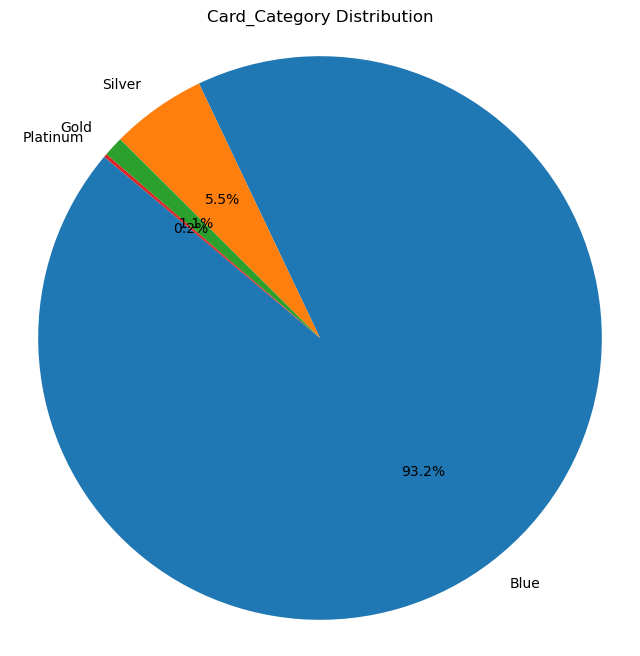

In [34]:
data = {
    'Card_Category': ['Blue', 'Silver', 'Gold', 'Platinum']
}
df_c = pd.DataFrame(data)

# Calculate counts
counts = df['Card_Category'].value_counts()
labels = counts.index
sizes = counts.values

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Card_Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()


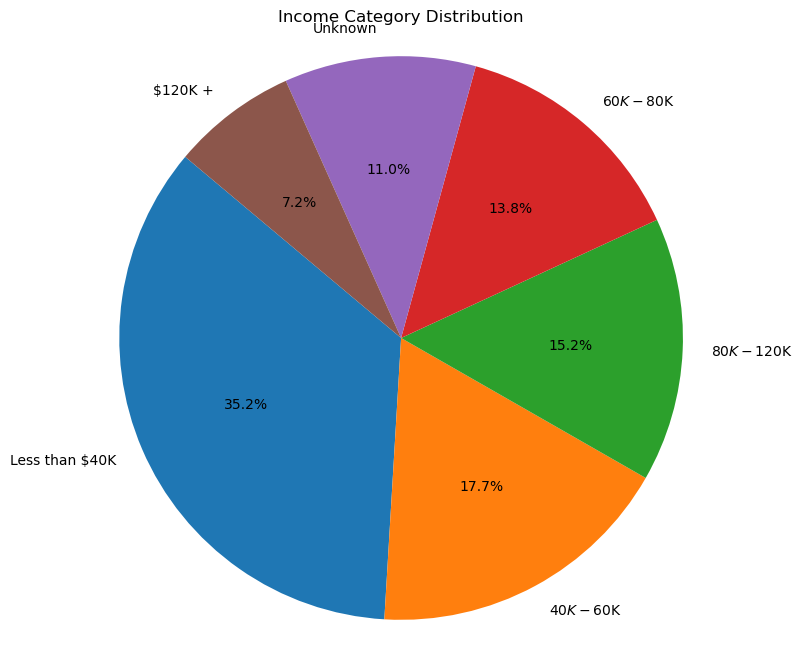

In [32]:
data = {
    'Income_Category': ['Less than $40K', '$40K - $60K', 'Unknown', '$60K - $80K', '$80K - $120K', '$120K +']
}
df_Inc = pd.DataFrame(data)

# Calculate counts
counts = df['Income_Category'].value_counts()
labels = counts.index
sizes = counts.values

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Income Category Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

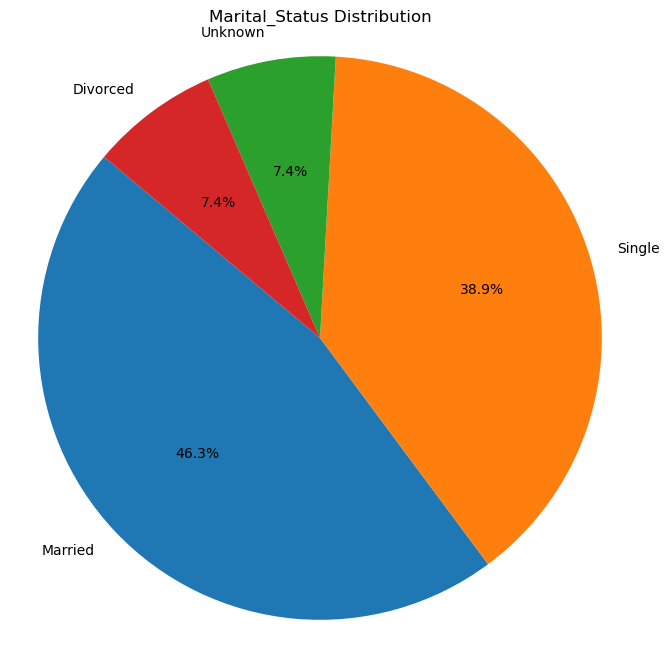

In [35]:
data = {
    'Marital_Status': ['Married', 'Single', '', 'Unknown', 'Divorced']
}
df_Mar= pd.DataFrame(data)

# Calculate counts
counts = df['Marital_Status'].value_counts()
labels = counts.index
sizes = counts.values

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title('Marital_Status Distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [36]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


/var/folders/kf/v9k59w1538s3y2l_0jk5x0br0000gn/T/ipykernel_1459/128234742.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/kf/v9k59w1538s3y2l_0jk5x0br0000gn/T/ipykernel_1459/128234742.py:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/var/folders/kf/v9k59w1538s3y2l_0jk5x0br0000gn/T/ipykernel_1459/128234

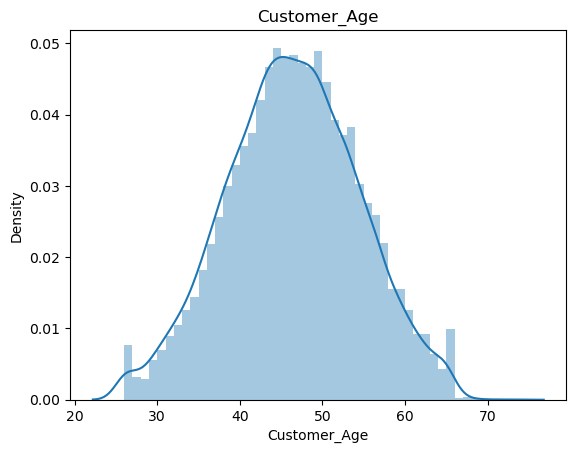

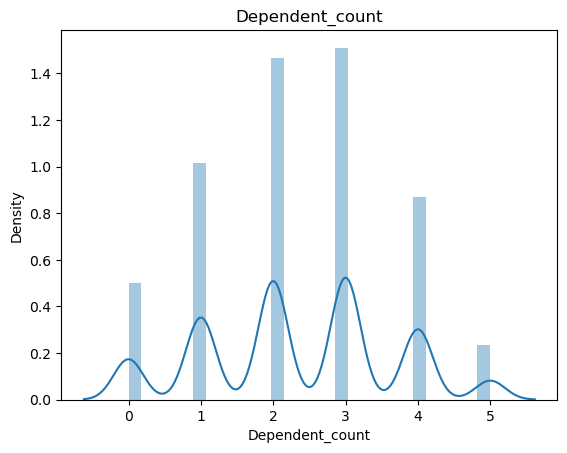

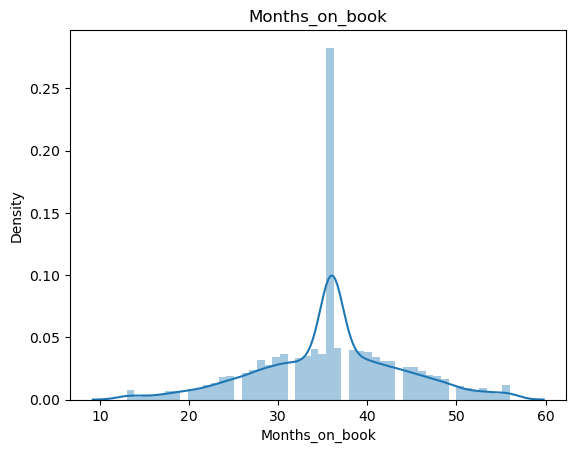

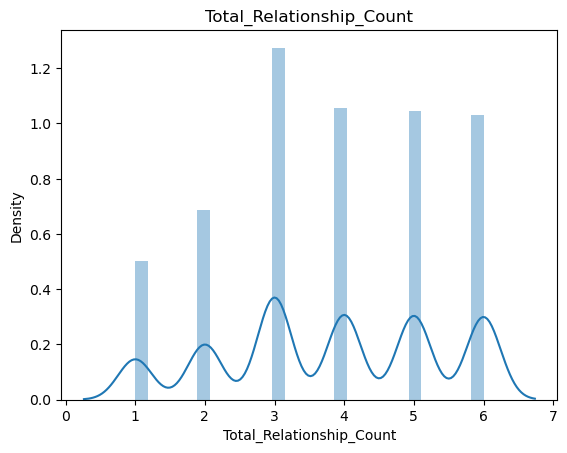

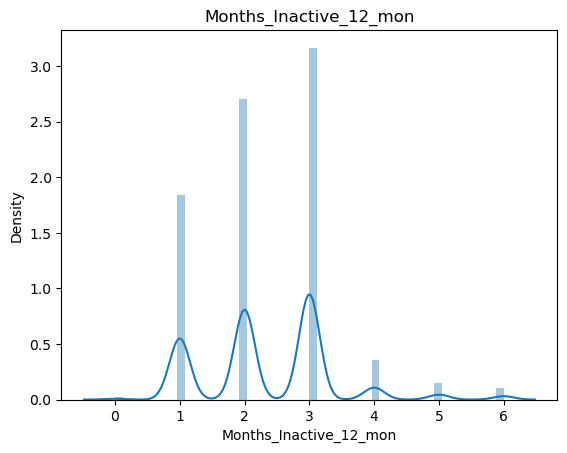

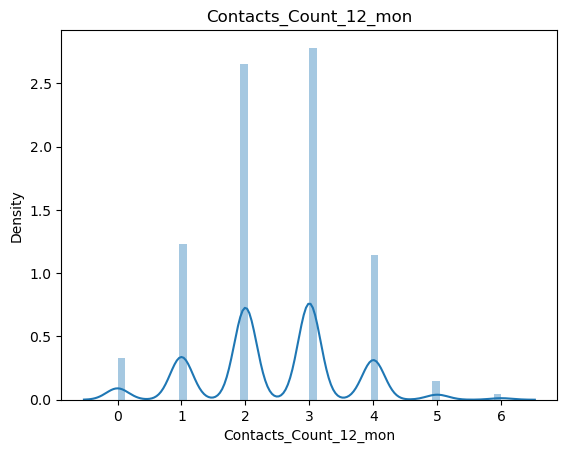

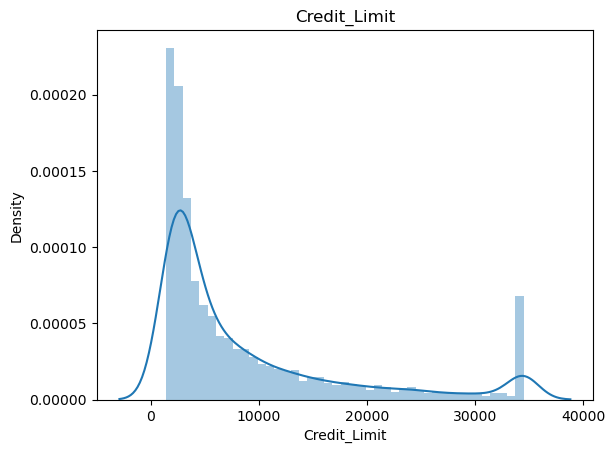

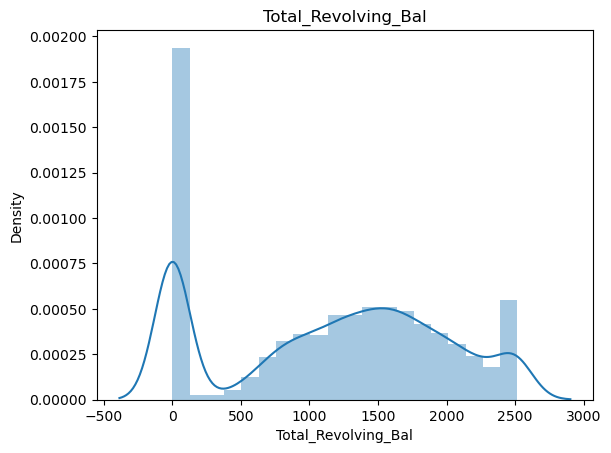

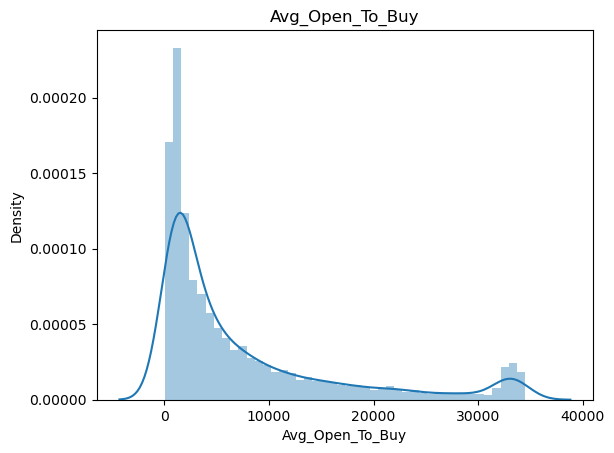

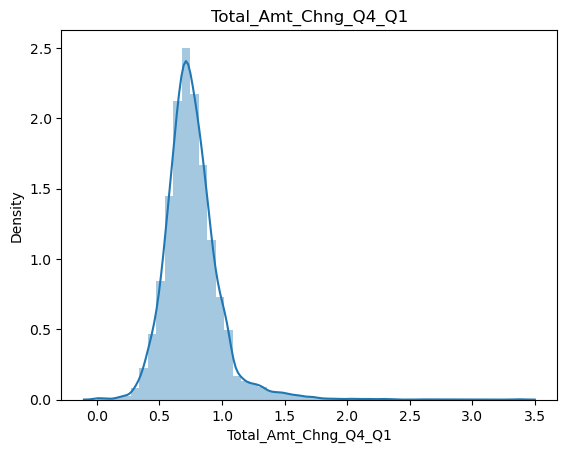

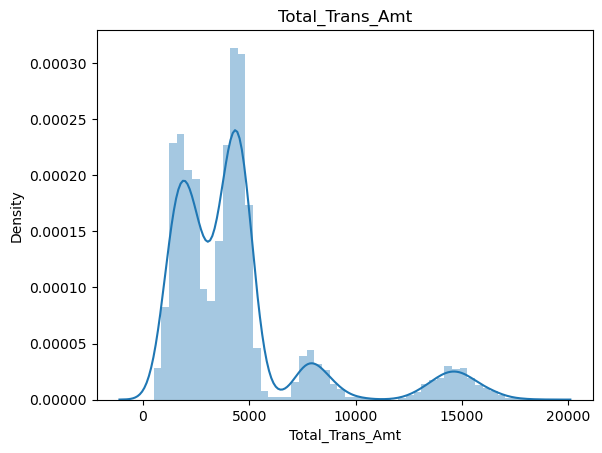

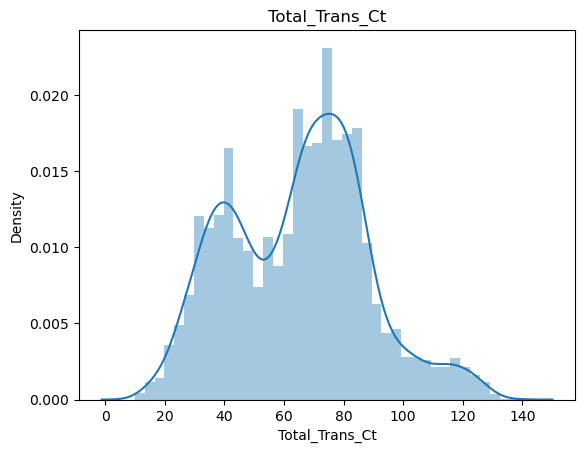

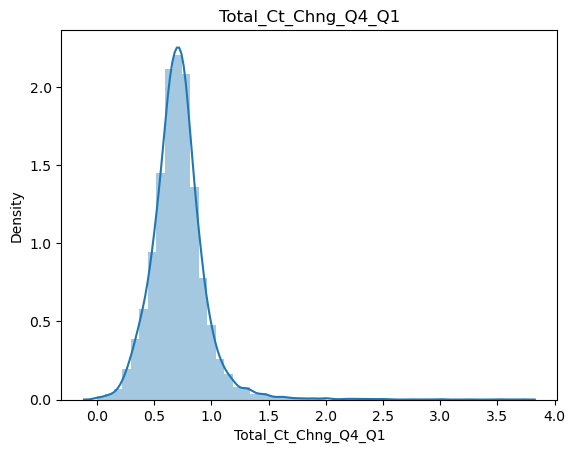

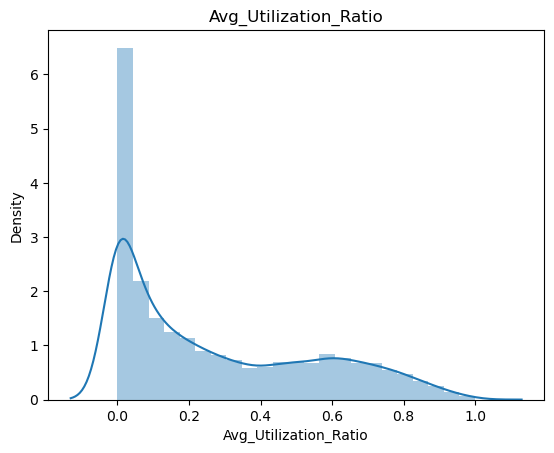

In [37]:
continous_features = df.select_dtypes(['float64','int64']).columns.to_list()

for cont_feature in continous_features: 
    plt.figure()
    plt.title(cont_feature)
    ax = sns.distplot(df[cont_feature])

/var/folders/kf/v9k59w1538s3y2l_0jk5x0br0000gn/T/ipykernel_1459/3085051698.py:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




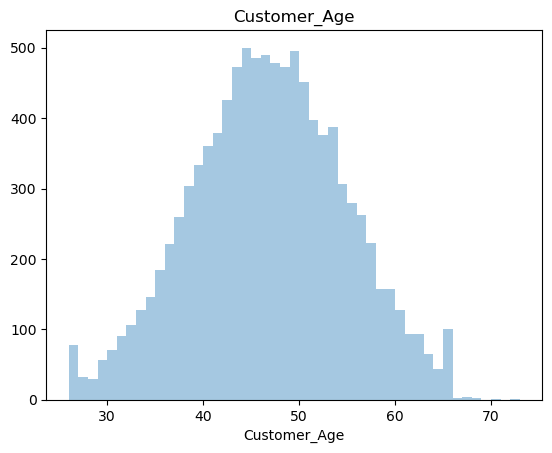

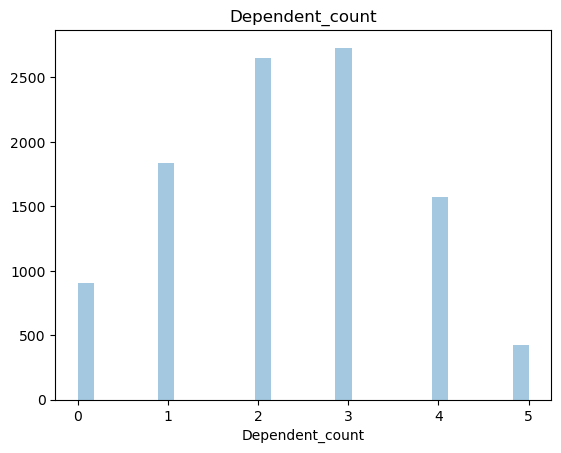

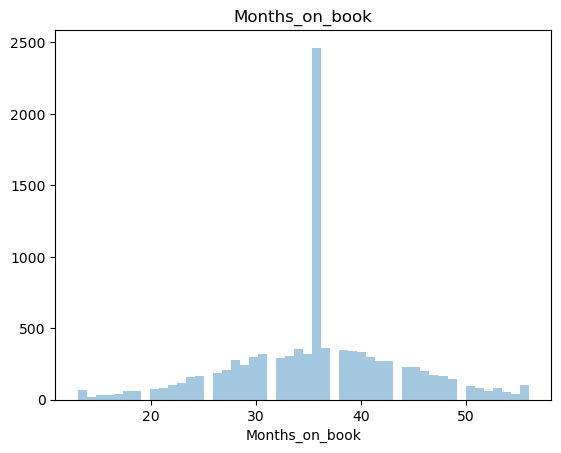

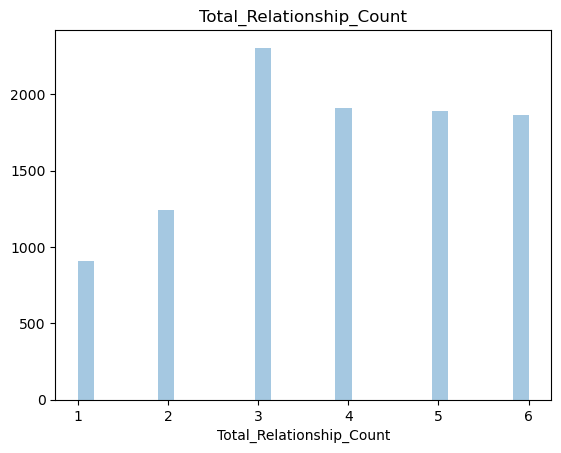

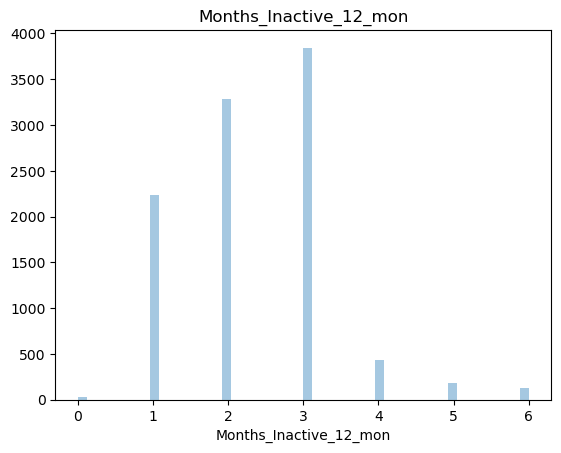

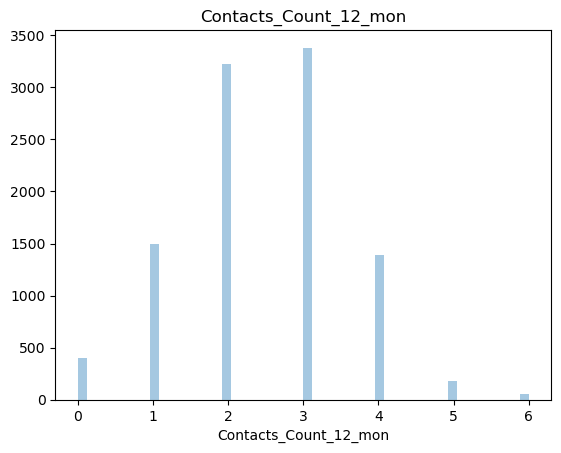

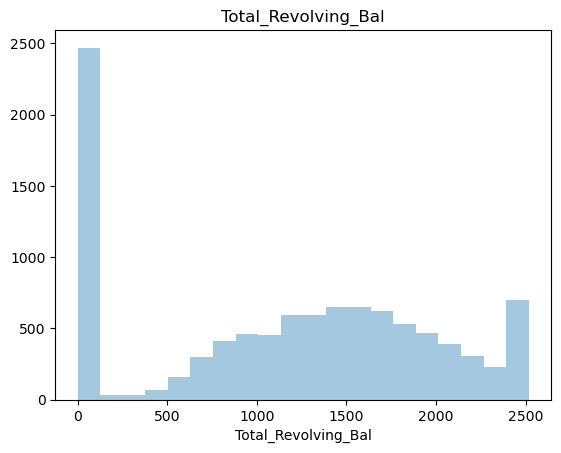

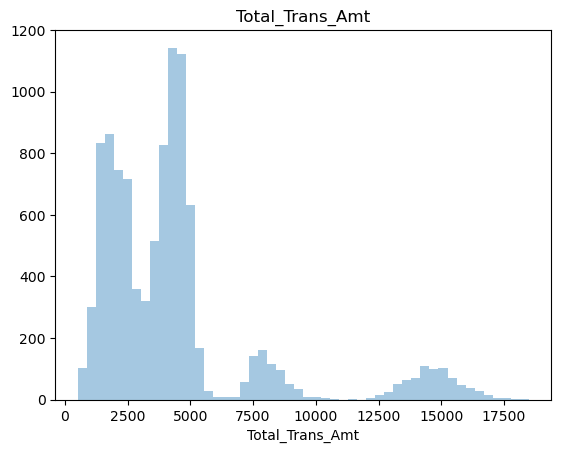

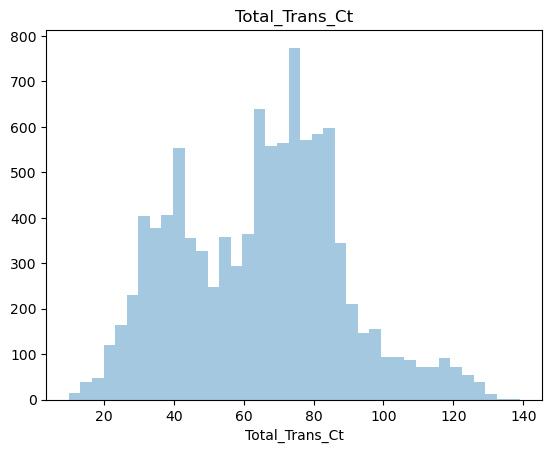

In [38]:
#%% Print the discrete features in the dataset 
discrete_features = df.select_dtypes(['int64']).columns.to_list()

for disc_feature in discrete_features: 
    plt.figure()
    plt.title(disc_feature)
    ax = sns.distplot(df[disc_feature],kde = False)

<Axes: >

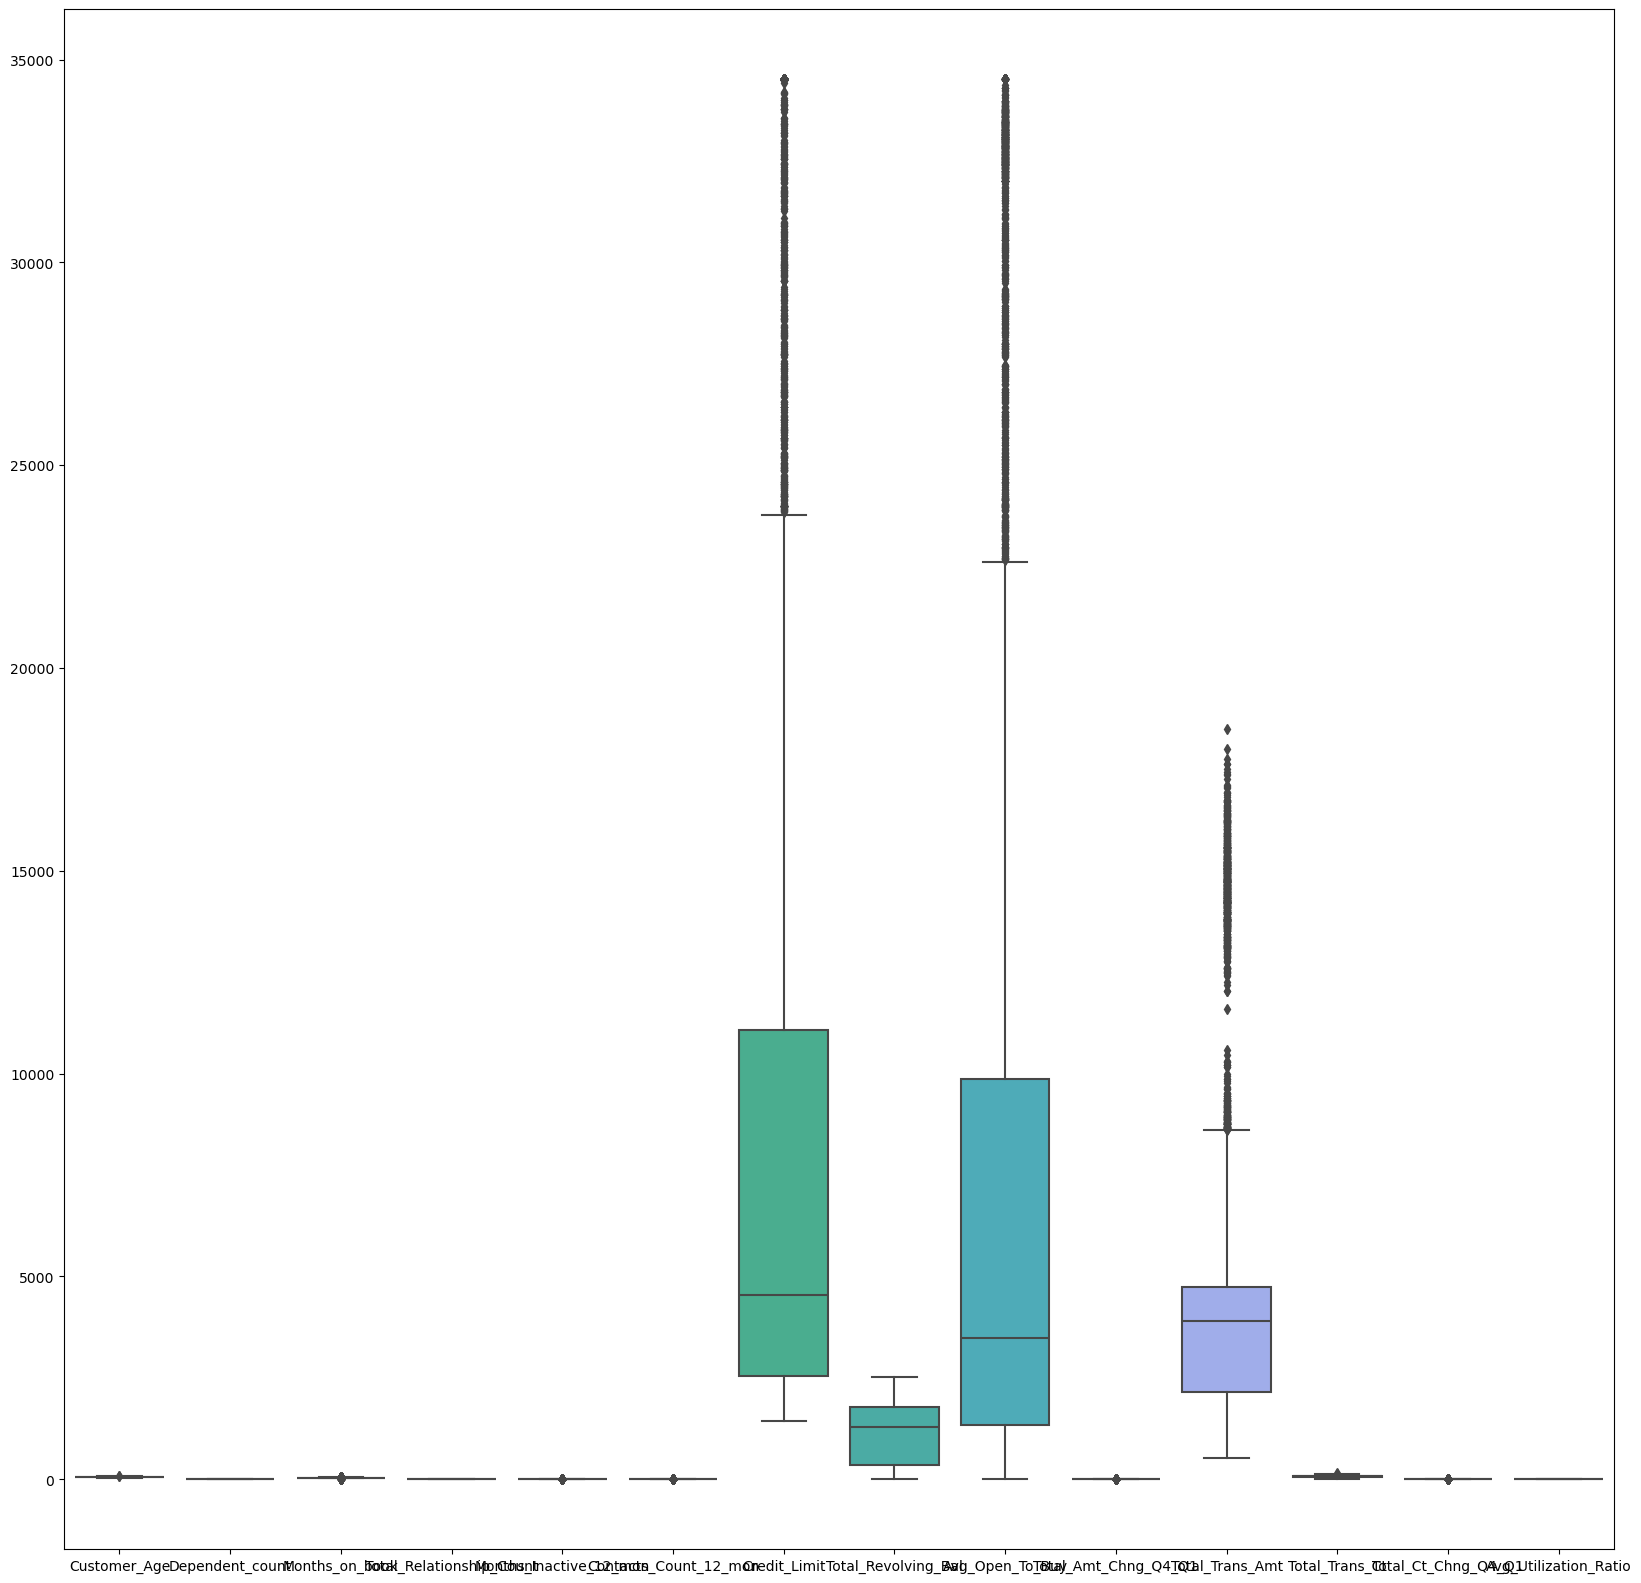

In [37]:
plt.figure(figsize = (20,20))
sns.boxplot(df)

In [39]:
#outlier removal 
Xnum = df.select_dtypes('number')

#outliear filter 
Q1 = Xnum.quantile(0.25)
Q3 = Xnum.quantile(0.75)
IQR = Q3-Q1
upperb = Q3 + 1.5*IQR
lowerb = Q1 - 1.5*IQR

df = df[~((Xnum<lowerb )|(Xnum>upperb)).any(axis = 1)] #remove all values above upper bound and lower than lower bound

<Axes: >

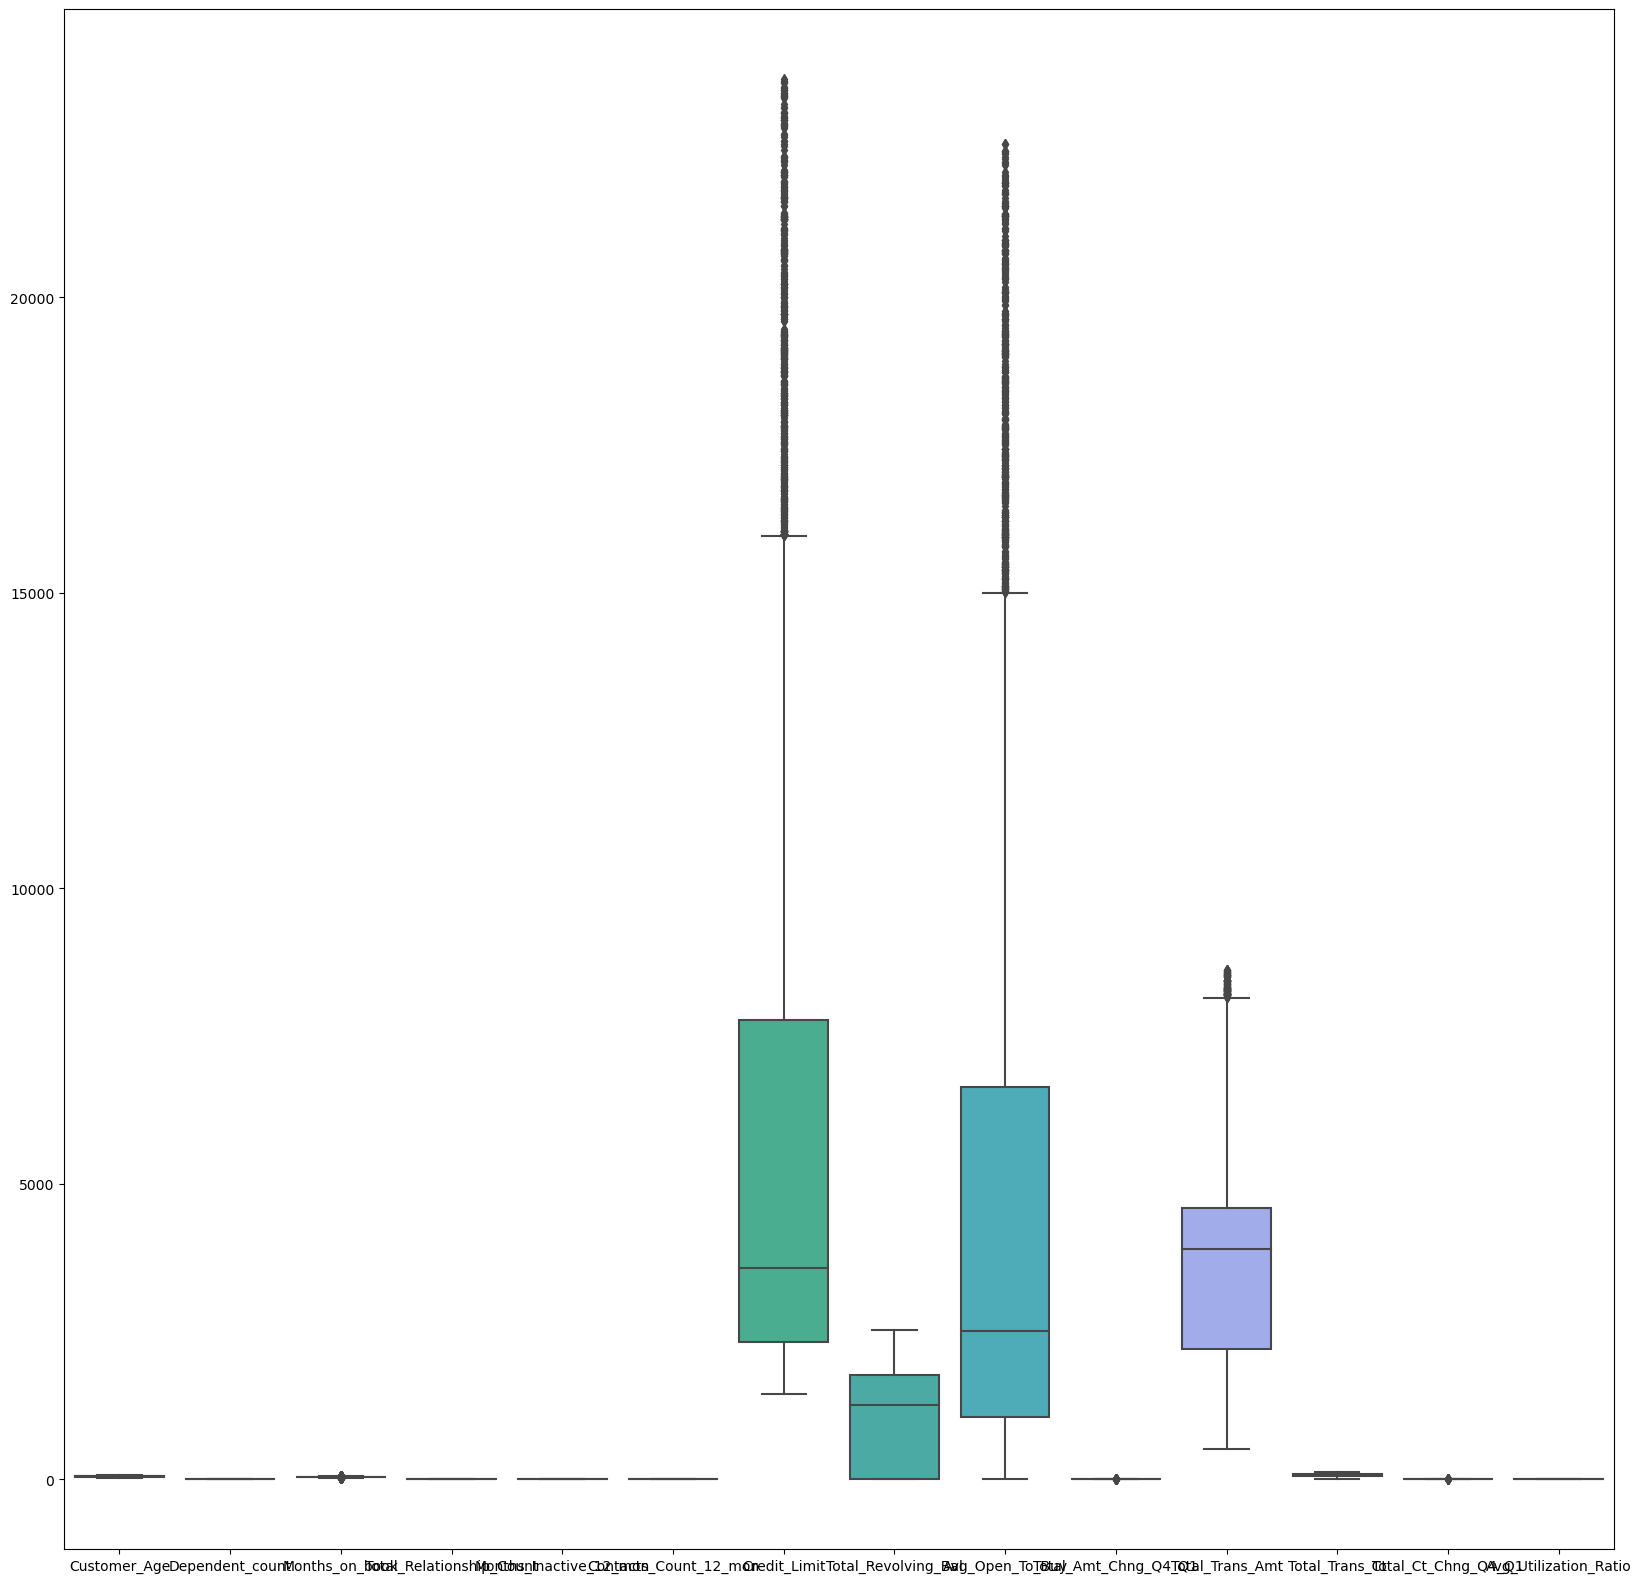

In [40]:
plt.figure(figsize = (20,20))
sns.boxplot(df)

In [41]:
Xnum = df.select_dtypes('number')

#outliear filter 
Q1 = Xnum.quantile(0.25)
Q3 = Xnum.quantile(0.75)
IQR = Q3-Q1
upperb = Q3 + 1.5*IQR
lowerb = Q1 - 1.5*IQR

df = df[~((Xnum<lowerb )|(Xnum>upperb)).any(axis = 1)] 

<Axes: >

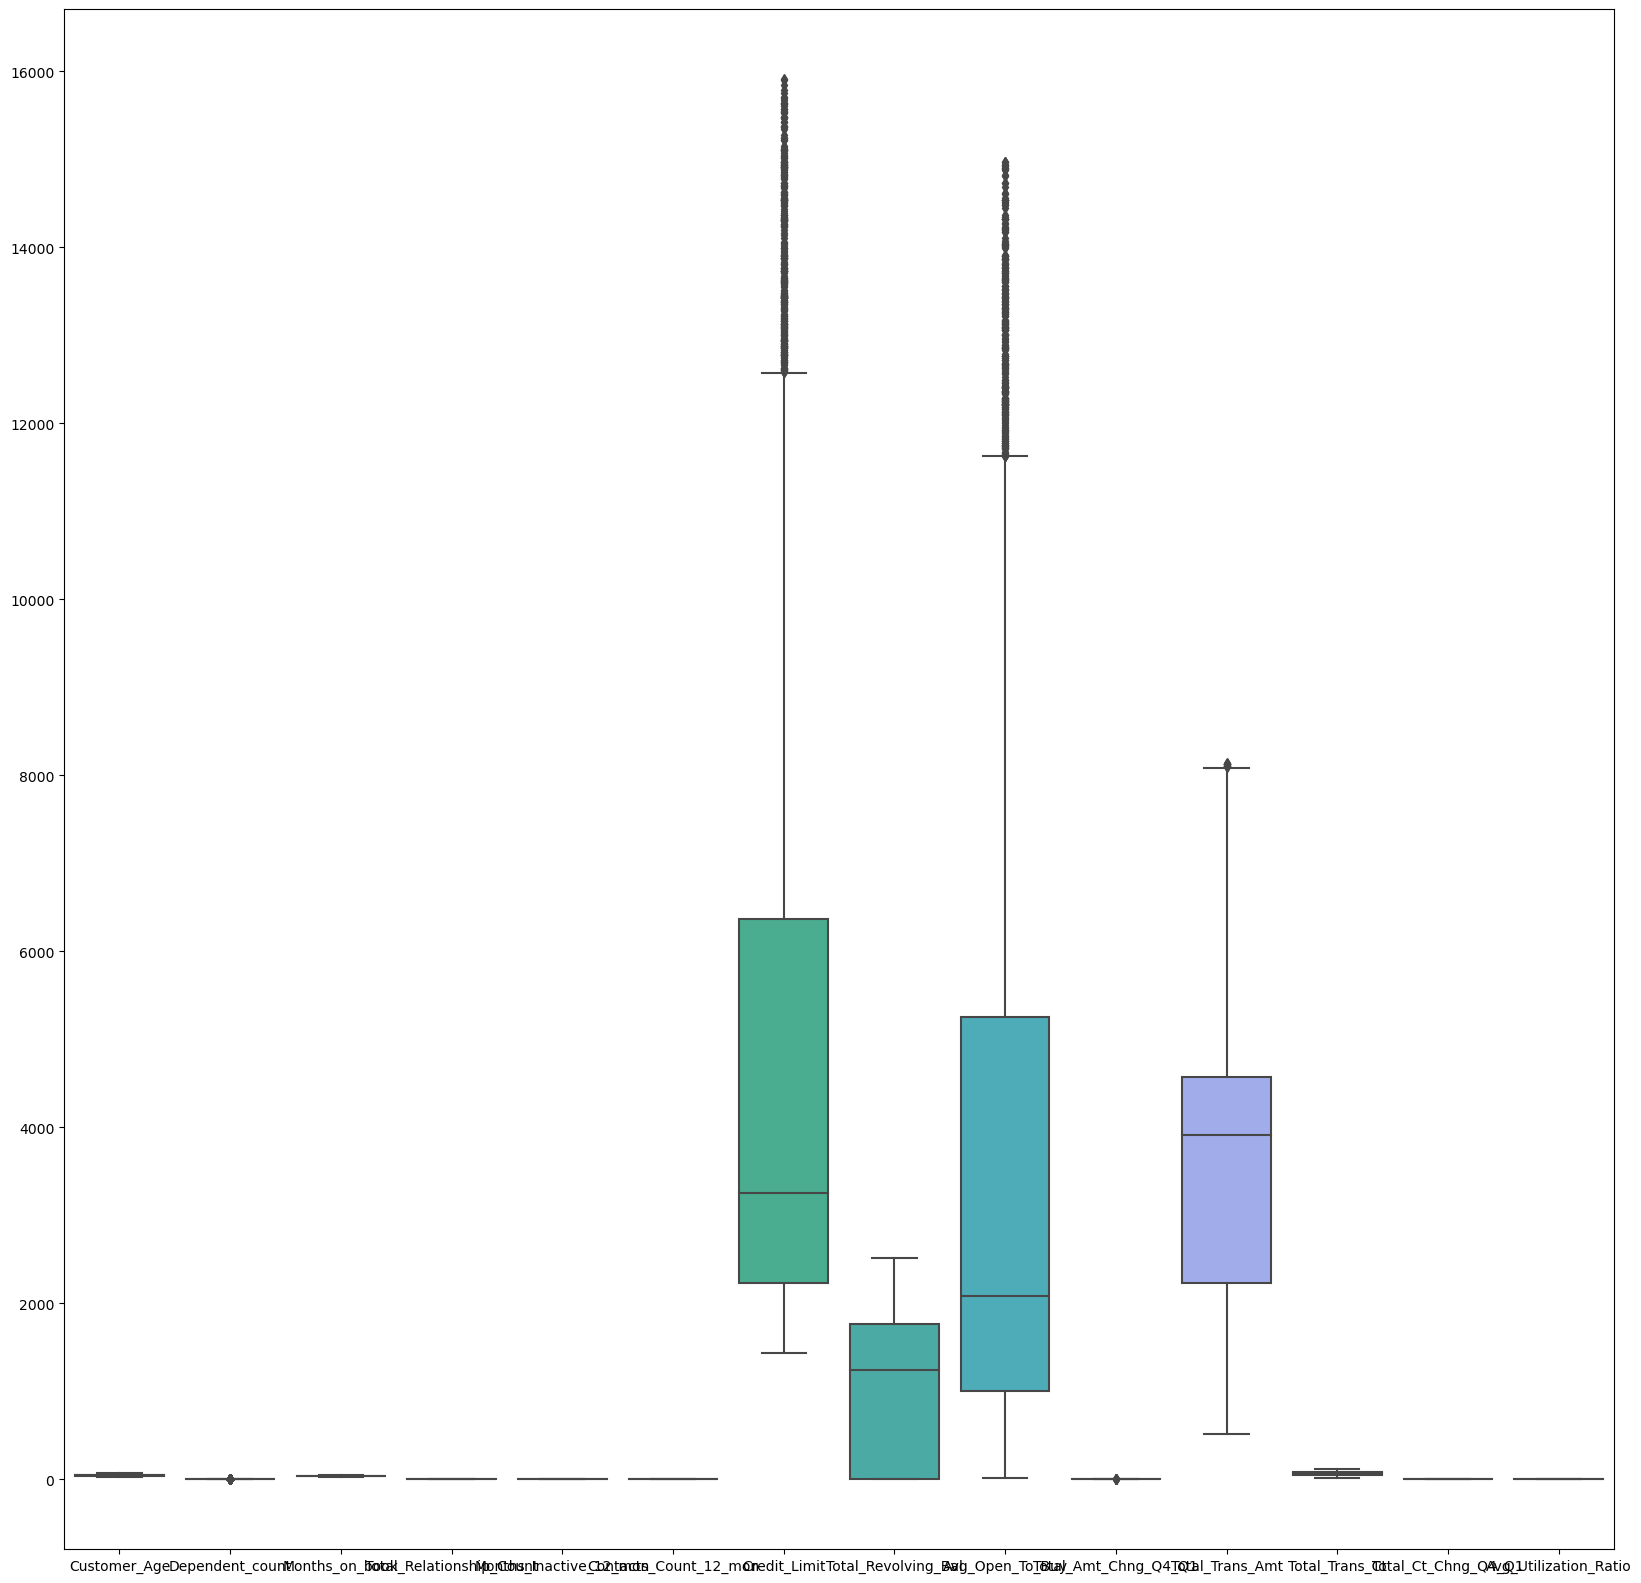

In [42]:
plt.figure(figsize = (20,20))
sns.boxplot(df)

In [43]:
df

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,Existing Customer,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
19,Existing Customer,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,Attrited Customer,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,Existing Customer,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
24,Existing Customer,54,M,2,Unknown,Married,$80K - $120K,Blue,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,Attrited Customer,52,M,3,Unknown,Single,$80K - $120K,Blue,44,1,2,4,3526.0,2429,1097.0,0.712,7775,63,0.909,0.689
10022,Attrited Customer,46,M,3,Graduate,Married,$60K - $80K,Blue,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,Attrited Customer,48,M,4,College,Married,$80K - $120K,Blue,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,Attrited Customer,49,F,4,Uneducated,Married,$40K - $60K,Blue,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000


In [44]:
df['Attrition_Flag'].unique()

array(['Existing Customer', 'Attrited Customer'], dtype=object)

In [45]:
df['Attrition_Flag'] = df['Attrition_Flag'].map({'Existing Customer': 0, 'Attrited Customer': 1})

In [46]:
df['Card_Category'].unique()

array(['Blue', 'Silver', 'Gold'], dtype=object)

In [47]:
X = df.drop(['Attrition_Flag'], axis = 1)
y = df.Attrition_Flag
X.head()

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
19,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
24,54,M,2,Unknown,Married,$80K - $120K,Blue,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000


In [48]:
X

,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,42,M,5,Uneducated,Unknown,$120K +,Blue,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
19,45,F,2,Graduate,Married,Unknown,Blue,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,62,F,0,Graduate,Married,Less than $40K,Blue,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,47,F,4,Unknown,Single,Less than $40K,Blue,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
24,54,M,2,Unknown,Married,$80K - $120K,Blue,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,52,M,3,Unknown,Single,$80K - $120K,Blue,44,1,2,4,3526.0,2429,1097.0,0.712,7775,63,0.909,0.689
10022,46,M,3,Graduate,Married,$60K - $80K,Blue,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,48,M,4,College,Married,$80K - $120K,Blue,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,49,F,4,Uneducated,Married,$40K - $60K,Blue,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000


In [49]:
y

10       0
19       0
21       1
23       0
24       0
        ..
9972     1
10022    1
10048    1
10067    1
10089    1
Name: Attrition_Flag, Length: 6068, dtype: int64

In [50]:
x_num = X.select_dtypes(include = 'number')
x_num

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,42,5,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
19,45,2,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,62,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,47,4,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
24,54,2,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,52,3,44,1,2,4,3526.0,2429,1097.0,0.712,7775,63,0.909,0.689
10022,46,3,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,48,4,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,49,4,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000


In [51]:
scaler = MinMaxScaler()
x_num_scale = scaler.fit_transform(x_num)

In [52]:
x_num_scale = pd.DataFrame(x_num_scale, columns = x_num.columns, index= x_num.index)

In [53]:
x_num_scale.shape

(6068, 14)

In [54]:
x_cat = X.select_dtypes(include = 'object')
x_cat.shape

(6068, 5)

In [55]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample DataFrame for demonstration (X)
X = pd.DataFrame(df)

# Select only the categorical columns
x_cat = X.select_dtypes(include='object')

# Apply LabelEncoder to each categorical column
label_encoders = {}
for col in x_cat.columns:
    label_encoders[col] = LabelEncoder()
    x_cat[col] = label_encoders[col].fit_transform(x_cat[col])

# Replace the original columns in X with the encoded values from x_num
for col in x_cat.columns:
    X[col] = x_cat[col]

print(X.shape)


(6068, 20)


In [56]:
X

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
10,0,42,1,5,5,3,0,0,31,5,3,2,6748.0,1467,5281.0,0.831,1201,42,0.680,0.217
19,0,45,0,2,2,1,5,0,37,6,1,2,14470.0,1157,13313.0,0.966,1207,21,0.909,0.080
21,1,62,0,0,2,1,4,0,49,2,3,3,1438.3,0,1438.3,1.047,692,16,0.600,0.000
23,0,47,0,4,6,2,4,0,36,3,3,2,2492.0,1560,932.0,0.573,1126,23,0.353,0.626
24,0,54,1,2,6,1,3,0,42,4,2,3,12217.0,0,12217.0,1.075,1110,21,0.750,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9972,1,52,1,3,6,2,3,0,44,1,2,4,3526.0,2429,1097.0,0.712,7775,63,0.909,0.689
10022,1,46,1,3,2,1,2,0,34,1,2,4,4930.0,159,4771.0,0.592,7412,60,0.579,0.032
10048,1,48,1,4,0,1,3,0,44,2,3,3,9524.0,1449,8075.0,0.559,7527,58,0.657,0.152
10067,1,49,0,4,5,1,1,0,36,5,2,3,4167.0,0,4167.0,0.581,7590,87,0.776,0.000


In [57]:
X = pd.concat([x_num_scale,x_cat], axis = 1)
X.shape

(6068, 19)

In [58]:
y.shape

(6068,)

In [59]:
X_train,X_test,y_train, y_test= train_test_split(X,y,test_size = 0.3, random_state =42)

In [60]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4247, 19)
(1821, 19)
(4247,)
(1821,)


## KNeighborsClassifier

In [61]:
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier(n_neighbors=5)
model.fit(X_train,y_train)

KNeighborsClassifier()

In [62]:
y_pred = model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8725974739154311

In [64]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1489,   35],
       [ 197,  100]])

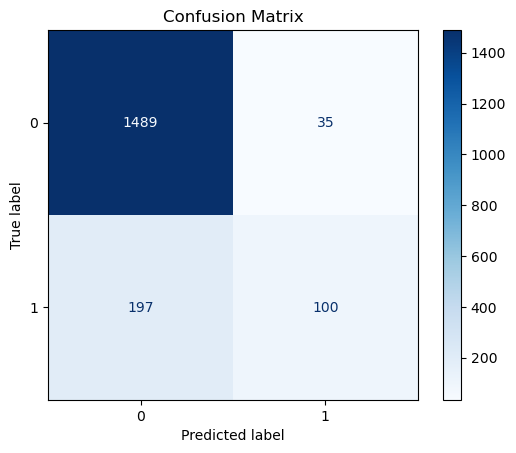

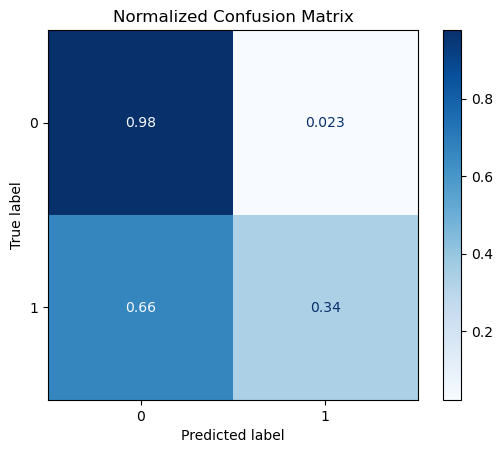

In [66]:
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=model.classes_,
    cmap=plt.cm.Blues,
    normalize=None
)
plt.title('Confusion Matrix')
plt.show()

# Plot normalized confusion matrix
ConfusionMatrixDisplay.from_estimator(
    model,
    X_test,
    y_test,
    display_labels=model.classes_,
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title('Normalized Confusion Matrix')
plt.show()

In [67]:
from sklearn.metrics import classification_report

In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.98      0.93      1524
           1       0.74      0.34      0.46       297

    accuracy                           0.87      1821
   macro avg       0.81      0.66      0.70      1821
weighted avg       0.86      0.87      0.85      1821



In [69]:
from sklearn.metrics import roc_curve, auc

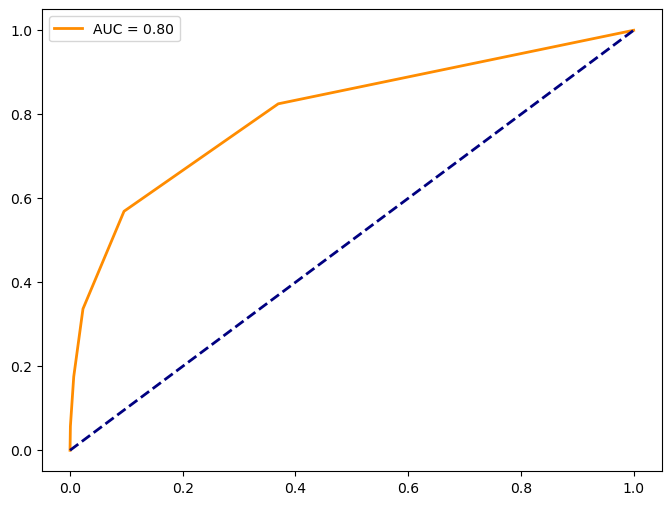

In [70]:
y_pred = model.predict_proba(X_test)[:, 1]
fpr, tpr,thresholds = roc_curve(y_test, y_pred)


roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.legend()
plt.show()

## DecisionTreeClassifier

In [71]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=1)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the test data
y_pred = clf.predict(X_test)

Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10}


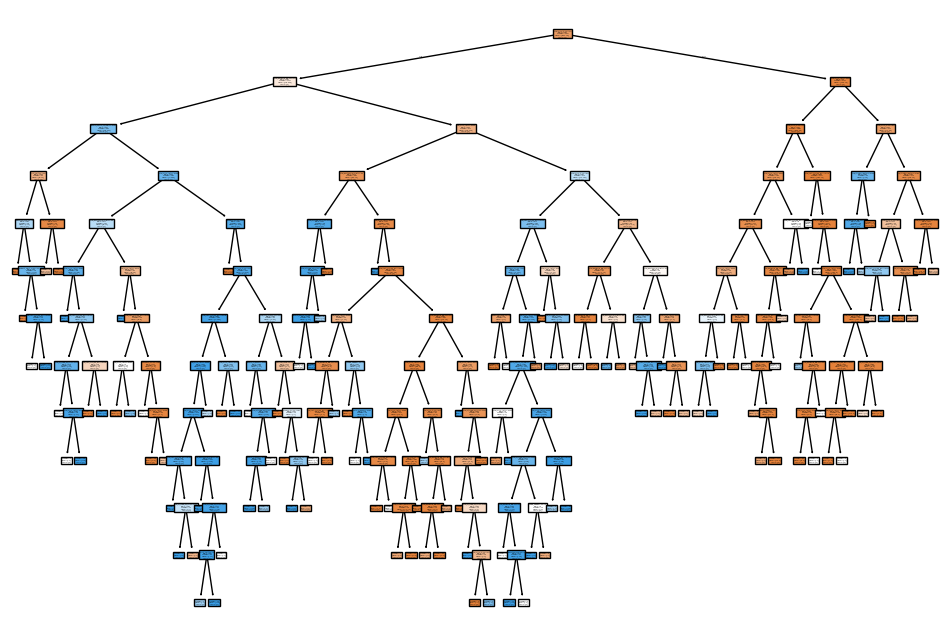

In [72]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import plot_tree
clf = DecisionTreeClassifier(random_state=42)

# Define the parameter grid
param_grid = {
    'criterion': ['gini'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Use the best estimator found by GridSearchCV
best_clf = grid_search.best_estimator_

# Predict on the test data
y_pred = best_clf.predict(X_test)

plt.figure(figsize=(12, 8))
plot_tree(best_clf, filled=True, feature_names=X_test.columns, class_names=True)
plt.show()

In [73]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.93


In [74]:
# Generate classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1524
           1       0.81      0.77      0.79       297

    accuracy                           0.93      1821
   macro avg       0.88      0.87      0.88      1821
weighted avg       0.93      0.93      0.93      1821



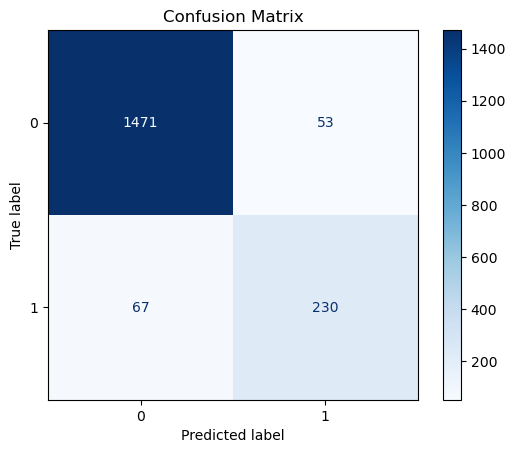

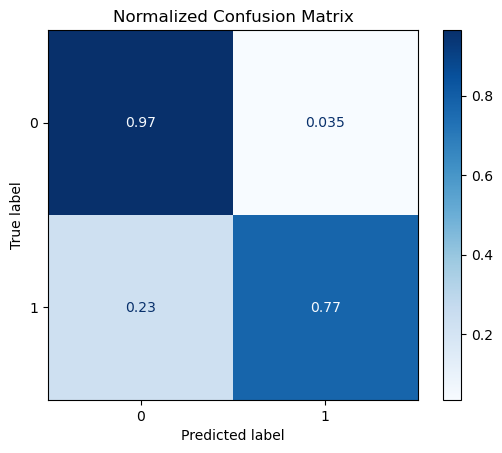

In [75]:
ConfusionMatrixDisplay.from_estimator(
    best_clf,
    X_test,
    y_test,
    display_labels=best_clf.classes_,
    cmap=plt.cm.Blues,
    normalize=None
)
plt.title('Confusion Matrix')
plt.show()

# Normalized Confusion Matrix
ConfusionMatrixDisplay.from_estimator(
    best_clf,
    X_test,
    y_test,
    display_labels=best_clf.classes_,
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title('Normalized Confusion Matrix')
plt.show()

## RandomForest

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc

In [77]:
# Step 2: Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42,n_estimators=200)
rf_model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [78]:
# Step 3: Predict on test data and calculate accuracy
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9632070291048874

In [79]:
# Step 4: Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1524
           1       0.91      0.86      0.88       297

    accuracy                           0.96      1821
   macro avg       0.94      0.92      0.93      1821
weighted avg       0.96      0.96      0.96      1821



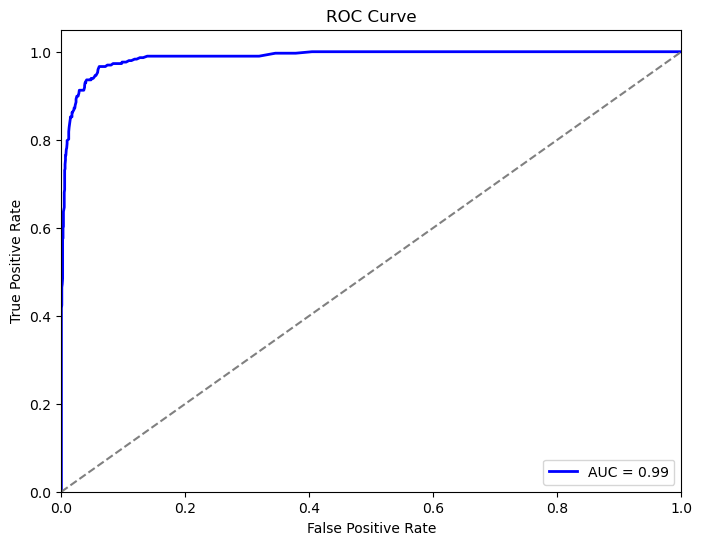

In [80]:
# Step 5: Plot ROC curve and calculate AUC
y_probs = rf_model.predict_proba(X_test)[:, 1]  # Probabilities of positive class
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

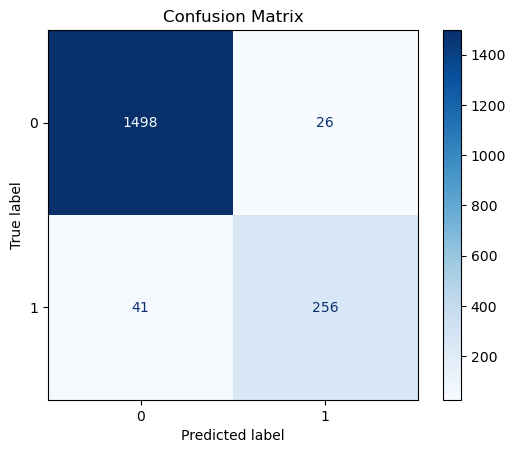

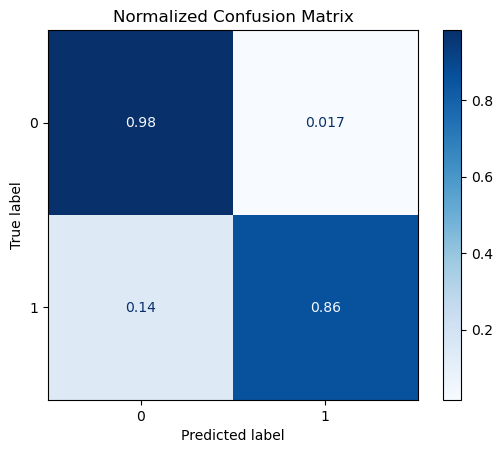

In [81]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=rf_model.classes_,
    cmap=plt.cm.Blues,
    normalize=None
)
plt.title('Confusion Matrix')
plt.show()

ConfusionMatrixDisplay.from_estimator(
    rf_model,
    X_test,
    y_test,
    display_labels=rf_model.classes_,
    cmap=plt.cm.Blues,
    normalize='true'
)
plt.title('Normalized Confusion Matrix')
plt.show()

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=200,max_depth=10)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(max_depth=10, n_estimators=200, random_state=42)

In [83]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Train Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42, n_estimators=100,max_depth=10)
gb_model.fit(X_train, y_train)

# Predict on test set
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)
print(f"Gradient Boosting Model Accuracy: {accuracy_gb:.4f}")


Gradient Boosting Model Accuracy: 0.9544
